In [1]:
import sys, random
sys.path.append("../")
from Core.maze import Maze, INF

In [2]:
def checkExists(maxe, x, y):
    if x in range(0,maze.num_columns) and y in range(0,maze.num_rows):
        if 0 in maze.grid[y][x].neighbors.values():
            return 1
    return 0

In [3]:
def randomPlayers(maze):
    players = []
    while len(players)!=6:
        x=random.randrange(0,maze.num_columns, 1)
        y=random.randrange(0,maze.num_rows, 1)
        if checkExists(maze,x,y):
            players.append((y,x))
    return players

In [4]:
def initLOS(maze, players):
    playerLOS=[]
    neighbors = [(-1,0,"N"),(1,0,"S"),(0,-1,"W"),(0,1,"E")]
    for player in players:
        y=player[0]
        x=player[1]
        limits=[]
        for a,b,c in neighbors:
            for i in range(0,max(maze.num_rows, maze.num_columns)):
                if maze.grid[y+a*i][x+b*i].neighbors[c]==INF:
                    limits.append(i)
                    break
        los=[]
        for i in range(y-limits[0],y+limits[1]+1):
            for j in range(x-limits[2],x+limits[3]+1):
                los.append((i,j))
        playerLOS.append(los)
    return playerLOS

In [5]:
def safeNodes(maze):
    players=randomPlayers(maze)
    playerLOS=initLOS(maze, players)
    danger = list(set().union(playerLOS[0],playerLOS[1],playerLOS[2],playerLOS[3],playerLOS[4],playerLOS[5]))
    safe=[]
    for y in range(0,maze.num_rows):
        for x in range(0, maze.num_columns):
            if checkExists(maze, x, y) and (y,x) not in danger:
                safe.append((y,x))
    maze.add_colors(path=safe, color=(0,255,0))
    maze.add_colors(path=players[:-1], color=(255,0,0))
    maze.add_colors(path=[players[-1]], color=(0,0,255))

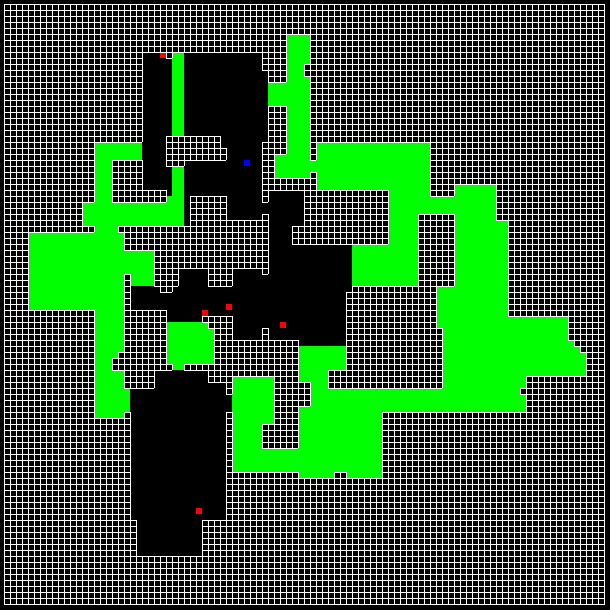

In [6]:
maze = Maze()
maze.load_from_image("Valorant_Ascent.jpg", 100)
safeNodes(maze)
display(maze.draw(cell_width=6))

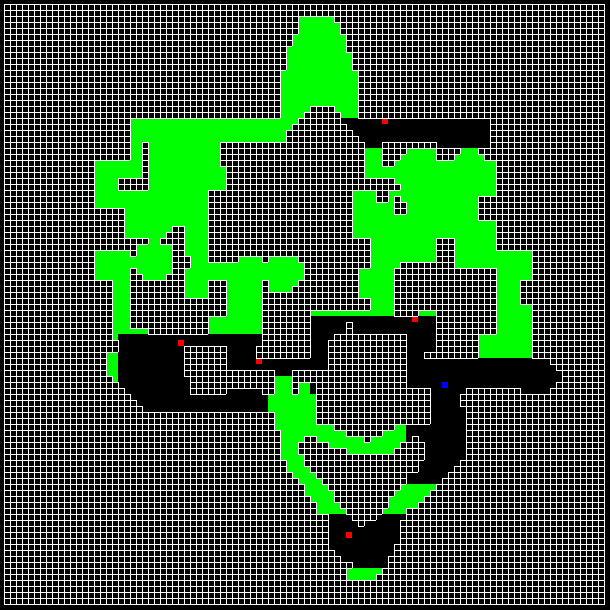

In [7]:
maze = Maze()
maze.load_from_image("Valorant_Bind.jpg", 100)
safeNodes(maze)
display(maze.draw(cell_width=6))

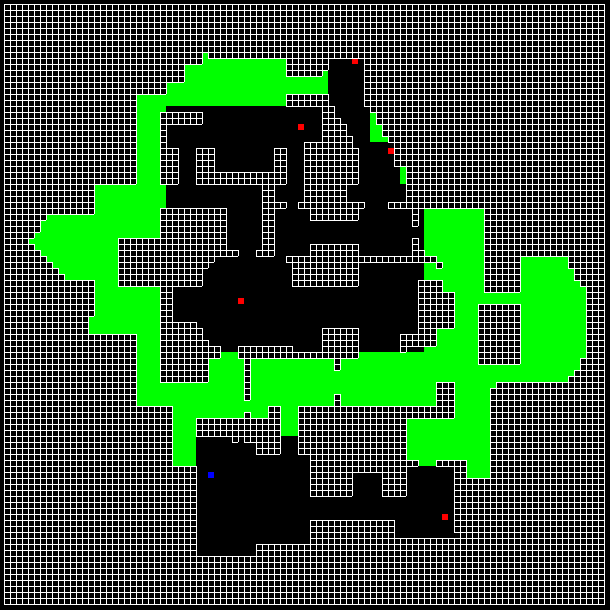

In [8]:
maze = Maze()
maze.load_from_image("Valorant_Haven.jpg", 100)
safeNodes(maze)
display(maze.draw(cell_width=6))

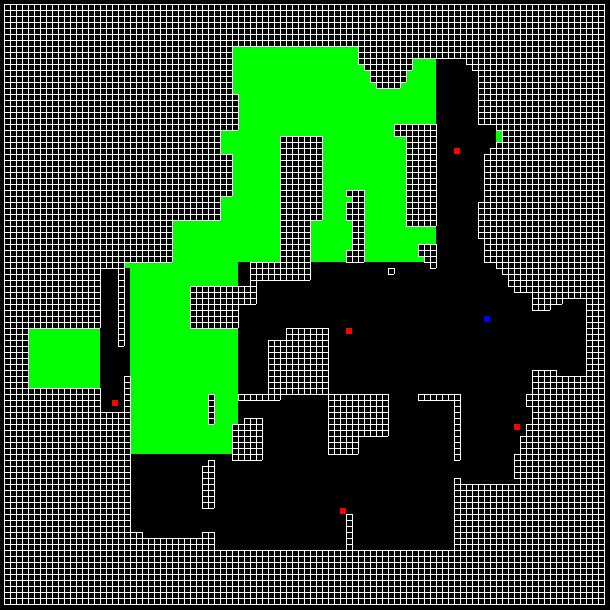

In [9]:
maze = Maze()
maze.load_from_image("Valorant_Icebox.jpg", 100)
safeNodes(maze)
display(maze.draw(cell_width=6))

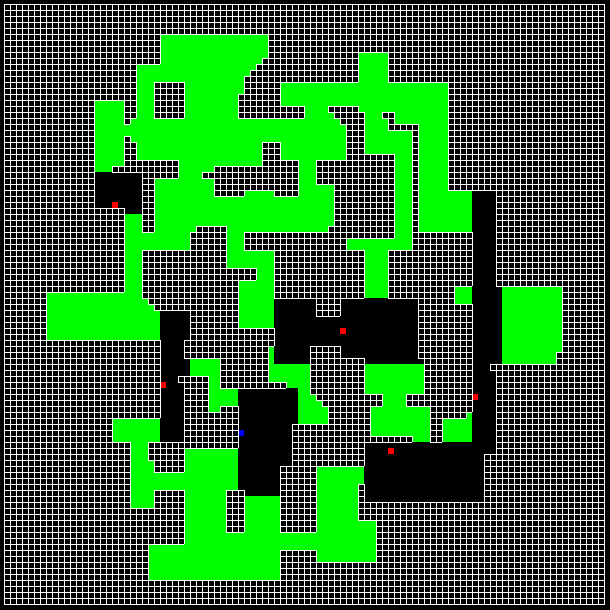

In [10]:
maze = Maze()
maze.load_from_image("Valorant_Split.jpg", 100)
safeNodes(maze)
display(maze.draw(cell_width=6))